In [2]:
pip install kmodes

In [3]:
pip install plotly

In [4]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import matplotlib as mpl
import seaborn as sns
from sklearn.cluster import KMeans
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import PowerTransformer
from keras.layers import Embedding
#import proplot as pplt
from kmodes.kprototypes import KPrototypes
import plotly.express as px

import warnings
warnings.filterwarnings('ignore')

In [5]:
Titanic = pd.read_csv(r'/content/Titanic (1).csv')
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Cabin,Embarked
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,NaN,S
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C85,C
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,NaN,S
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,C123,S
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,NaN,S


In [6]:
Titanic.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 891 entries, 0 to 890
Data columns (total 12 columns):
 #   Column       Non-Null Count  Dtype  
---  ------       --------------  -----  
 0   PassengerId  891 non-null    int64  
 1   Survived     891 non-null    int64  
 2   Pclass       891 non-null    int64  
 3   Name         891 non-null    object 
 4   Sex          891 non-null    object 
 5   Age          714 non-null    float64
 6   SibSp        891 non-null    int64  
 7   Parch        891 non-null    int64  
 8   Ticket       891 non-null    object 
 9   Fare         891 non-null    float64
 10  Cabin        204 non-null    object 
 11  Embarked     889 non-null    object 
dtypes: float64(2), int64(5), object(5)
memory usage: 83.7+ KB


In [7]:
Titanic.shape

(891, 12)

<Axes: >

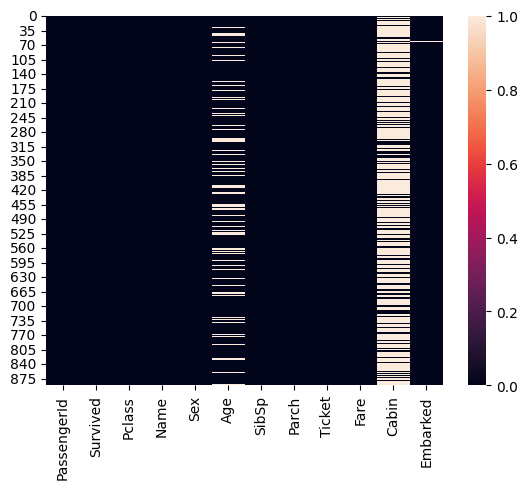

In [8]:
sns.heatmap(Titanic.isnull())

<Axes: xlabel='Survived', ylabel='count'>

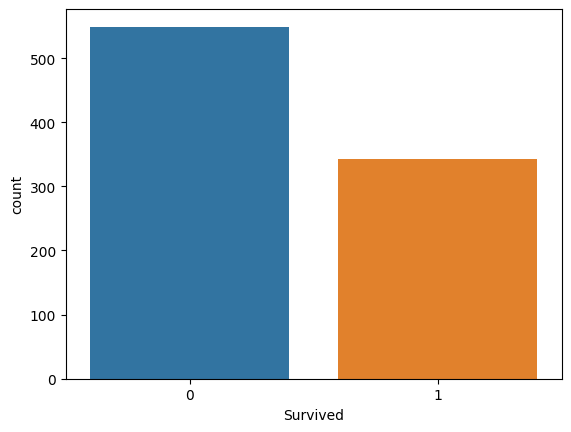

In [9]:
sns.countplot(x='Survived', data= Titanic)

More people lost their lives on Titanic, further we will classify their passenger class and see the results.

<Axes: xlabel='Survived', ylabel='count'>

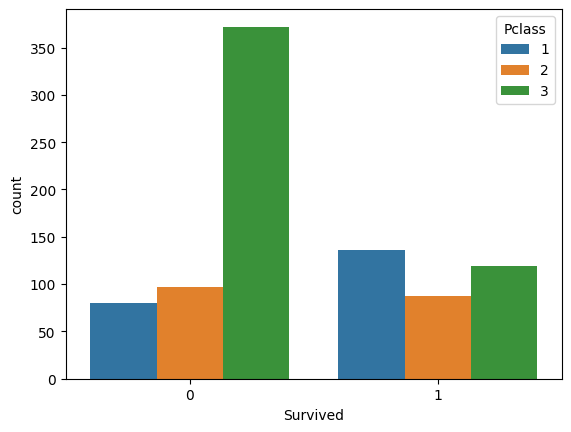

In [10]:
sns.countplot(x= 'Survived', hue= 'Pclass', data=Titanic)

As the plot shows more people from Passenger Class 3 died while more people from passenger class 1 survived the calamity.

<Axes: xlabel='Age', ylabel='Density'>

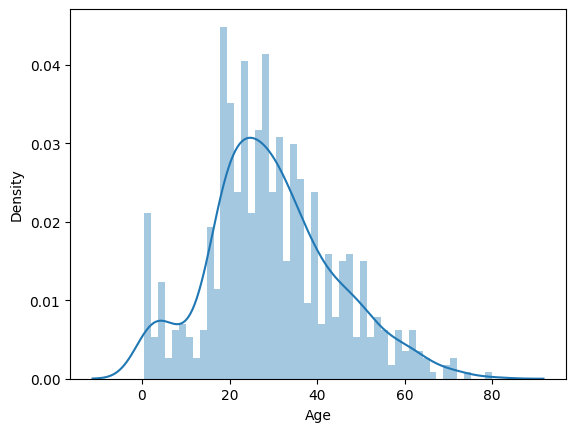

In [11]:
sns.distplot(Titanic['Age'].dropna(),bins=50)

<Axes: xlabel='Pclass', ylabel='Age'>

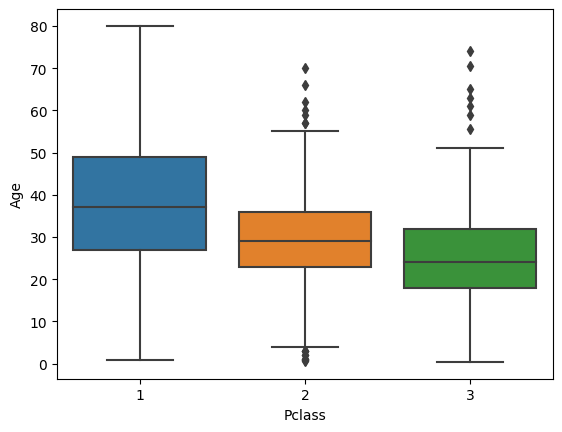

In [12]:
sns.boxplot(x='Pclass',y='Age',data=Titanic)

This boxplot shows that more people were aged between 30 - 50 who were 1st Class Passenger. And more of the 3rd Class Passenger are of age group 20 to 40 While 2nd Class passenger are of age group 25 - 35

In [13]:
null_values_sum = Titanic.isnull().sum()
print(null_values_sum)

PassengerId      0
Survived         0
Pclass           0
Name             0
Sex              0
Age            177
SibSp            0
Parch            0
Ticket           0
Fare             0
Cabin          687
Embarked         2
dtype: int64


In [14]:
Titanic['Age'] = Titanic['Age'].fillna(Titanic['Age'].median())

In [15]:
Titanic = Titanic.drop(['Cabin'],axis=1)

In [16]:
Titanic = Titanic.dropna(subset=['Embarked'])

In [17]:
Titanic['Embarked'].unique()

array(['S', 'C', 'Q'], dtype=object)

In [18]:
df1 = pd.get_dummies(Titanic['Embarked'],drop_first=True)

In [19]:
df2 = pd.get_dummies(Titanic['Sex'],drop_first = True)

In [20]:
Titanic = pd.concat([Titanic,df1],axis=True)

In [21]:
Titanic = pd.concat([Titanic,df2],axis=True)

In [22]:
Titanic.head()

,PassengerId,Survived,Pclass,Name,Sex,Age,SibSp,Parch,Ticket,Fare,Embarked,Q,S,male
0,1,0,3,"Braund, Mr. Owen Harris",male,22.0,1,0,A/5 21171,7.2500,S,0,1,1
1,2,1,1,"Cumings, Mrs. John Bradley (Florence Briggs Th...",female,38.0,1,0,PC 17599,71.2833,C,0,0,0
2,3,1,3,"Heikkinen, Miss. Laina",female,26.0,0,0,STON/O2. 3101282,7.9250,S,0,1,0
3,4,1,1,"Futrelle, Mrs. Jacques Heath (Lily May Peel)",female,35.0,1,0,113803,53.1000,S,0,1,0
4,5,0,3,"Allen, Mr. William Henry",male,35.0,0,0,373450,8.0500,S,0,1,1


In [23]:
Titanic = Titanic.drop(['Name','Sex','Ticket','Embarked'],axis=1)

Model Building

In [24]:
Dv = Titanic['Survived']
Idv = Titanic.drop(['Survived'],axis=1)

In [25]:
from sklearn.model_selection import train_test_split

In [26]:
x_train,x_test,y_train,y_test = train_test_split(Idv,Dv,test_size=0.30, random_state = 101)

In [ ]:
x_train.shape

In [28]:
x_test.shape

(267, 9)

In [29]:
y_train.shape

(622,)

In [30]:
y_test.shape

(267,)

In [31]:
from sklearn.linear_model import LogisticRegression

In [32]:
LR = LogisticRegression()

In [33]:
LR.fit(x_train,y_train)

LogisticRegression()

In [38]:
y_pred

array([0, 0, 1, 1, 0, 0, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 0, 1,
       1, 0, 1, 1, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0, 0,
       0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0, 0, 0, 0, 1, 0, 0, 0, 0, 1, 0, 1,
       0, 1, 1, 0, 0, 0, 0, 1, 1, 0, 0, 1, 0, 1, 0, 0, 0, 0, 1, 1, 0, 0,
       0, 0, 1, 1, 0, 1, 0, 0, 1, 1, 0, 0, 0, 0, 0, 0, 1, 1, 1, 1, 0, 0,
       1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0, 1, 1, 1,
       0, 0, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 1, 1, 0, 0, 1, 0, 1, 1, 0, 0, 0, 0, 0, 1, 0, 0, 0, 1, 0,
       0, 1, 0, 0, 1, 0, 0, 0, 0, 0, 0, 0, 0, 0, 1, 0, 0, 1, 1, 0, 0, 0,
       1, 0, 0, 0, 1, 0, 0, 1, 0, 0, 1, 0, 0, 0, 1, 1, 1, 0, 1, 0, 0, 0,
       0, 0, 1, 0, 0, 1, 0, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 0,
       0, 1, 1])

In [37]:
y_pred = LR.predict(x_test)

In [39]:
from sklearn.metrics import confusion_matrix

In [40]:
confusion_matrix(y_pred,y_test)

array([[148,  36],
       [ 15,  68]])

In [41]:
LR.score(Idv,Dv)

0.7862767154105736

Model Evaluation



In [42]:
from sklearn import metrics

In [43]:
Acc = metrics.accuracy_score(y_test,y_pred)
Precision = metrics.precision_score(y_test,y_pred)
Recall = metrics.recall_score(y_test,y_pred)

In [44]:
print(Acc)
print(Precision)
print(Recall)

0.8089887640449438
0.8192771084337349
0.6538461538461539


In [48]:
df3 = pd.DataFrame({'Prediction':y_pred})

In [49]:
y_pred.to_csv('Titanicpred.csv', index = False)

AttributeError: ignored

In [50]:
np.savetxt('prediction.csv',y_pred,delimiter=',',fmt ='%d')